In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = 'c:/Windows/Fonts/malgun.ttf'

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from fbprophet import Prophet
from datetime import datetime

In [3]:
pinkwink_web = pd.read_csv('../data/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names = ['date','hit'], index_col=0)

pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


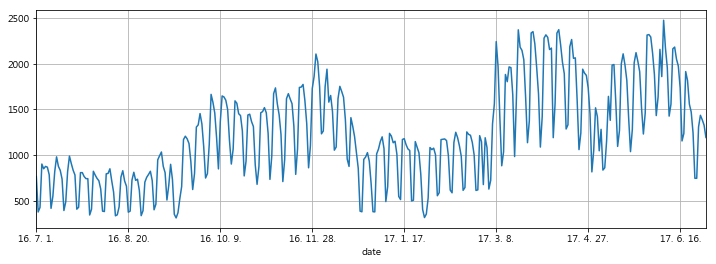

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [5]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit (time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit (time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit (time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit (time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.859730811
430.628410189
429.532804668
330.477730644


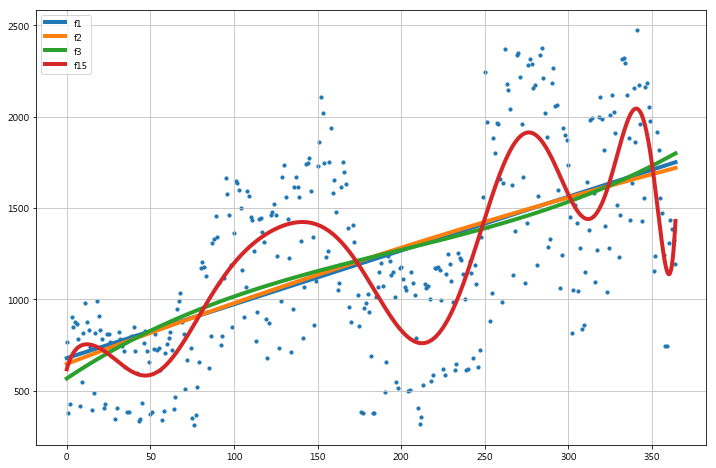

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()


In [9]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace = True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.761130,700.096556,1114.710235
421,2017-08-26,497.711704,288.331932,722.589914
422,2017-08-27,630.268176,439.695648,841.020678
423,2017-08-28,1182.888299,953.022233,1398.725444
424,2017-08-29,1218.800002,1003.381063,1425.217434


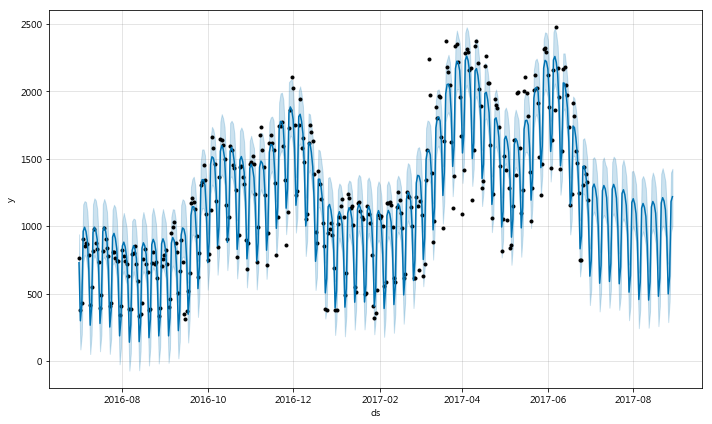

In [12]:
m.plot(forecast);

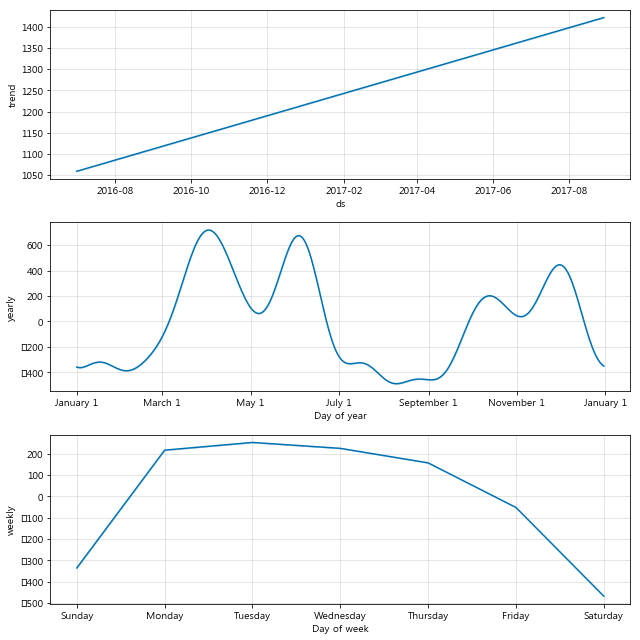

In [13]:
m.plot_components(forecast);

In [14]:
from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2003-1-1' 
end_date = '2018-10-10' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,9190.0,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,9550.0,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,9700.0,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,9420.0,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,9520.0,599800


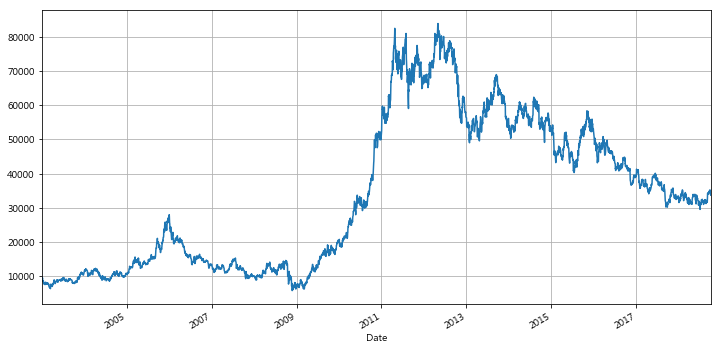

In [15]:
KIA['Close'].plot(figsize=(12,6), grid=True);

In [16]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,9190.0,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,9550.0,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,9700.0,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,9420.0,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,9520.0,599800
2003-01-09,9400.0,9440.0,8940.0,8940.0,8940.0,1358600
2003-01-10,9050.0,9150.0,8300.0,8470.0,8470.0,2584500
2003-01-13,8500.0,8670.0,8160.0,8650.0,8650.0,1125100
2003-01-14,8630.0,8750.0,8450.0,8540.0,8540.0,1095900


In [17]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


In [18]:
m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3833,2017-12-25
3834,2017-12-26
3835,2017-12-27
3836,2017-12-28
3837,2017-12-29


In [20]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3833,2017-12-25,34371.866883,24774.033221,44954.056224
3834,2017-12-26,34409.427029,25012.563996,43782.554854
3835,2017-12-27,34372.545068,25332.880797,43776.148771
3836,2017-12-28,34315.084592,25143.941698,44058.596253
3837,2017-12-29,34221.272324,24261.737505,44241.673539


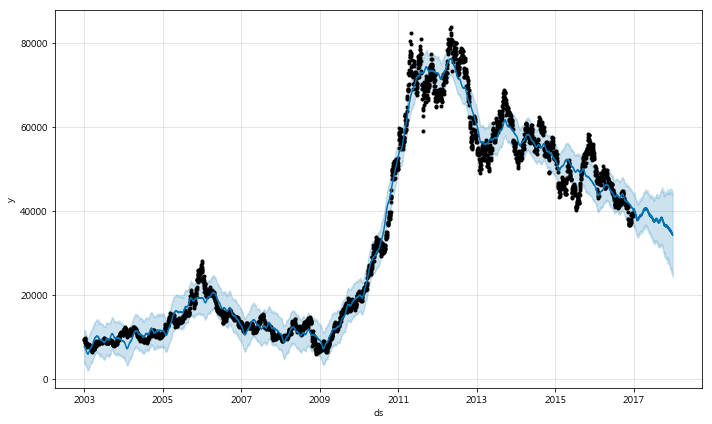

In [21]:
m.plot(forecast);

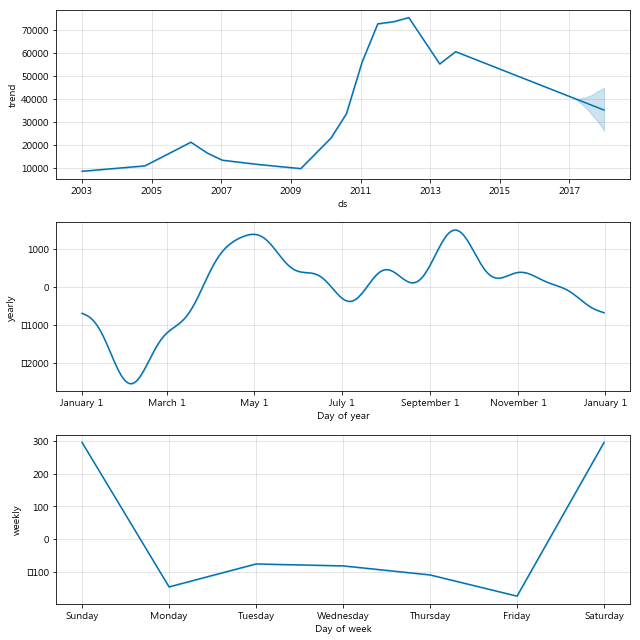

In [22]:
m.plot_components(forecast);

[*********************100%***********************]  1 of 1 downloaded


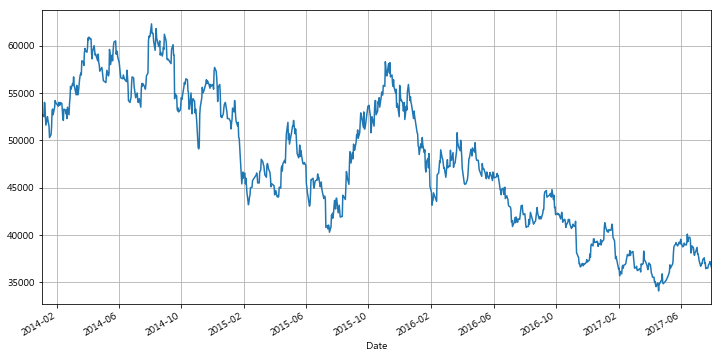

In [23]:
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True)